<img src="https://avatars.githubusercontent.com/u/73504156?s=100&v=4" style="float: left; margin-right: 15px; width: 75px;">
<h1 style="margin-bottom: -1px; margin-top: 5px;">Intro to Machine Learning</h1>
    <div>Linear Regression Demo</div>
        <div style="float: left; margin-right: 5px;">
            David Yerrington / <a href="http://www.doseofdata.com/">Dose of Data</a>
        </div>
    </div>
    <a href="http://www.github.com/dose-of-data"><img src="https://snipboard.io/mFdILJ.jpg" style="width: 20px; display: inline-block;" /></a>
    <a href="http://www.linkedin.com/in/davidyerrington"><img src="https://snipboard.io/UZ3azp.jpg" style="width: 20px;"></a>
    <a href="https://discord.gg/YbxFzrg2PD"><img src="https://snipboard.io/NHlrIG.jpg" style="width: 20px;"></a>

</div>

This demo provides an introduction to linear regression using Python and scikit-learn. It covers the basics of Jupyter Notebook, Pandas, and scikit-learn, and provides step-by-step instructions for loading, preprocessing, training, and evaluating a linear regression model. The demo is designed for newcomers to machine learning who want to learn the basics of linear regression and how to use Python and scikit-learn to build and train a model.



1. **Introduction**: Explain the basics of linear regression and the tools used in the demo (Python, Jupyter notebook, Pandas, and scikit-learn).
1. **Data Preprocessing**: Load and preprocess a sample dataset using Pandas, and visualize the data using Matplotlib.
1. **Model Training**: Build and train a linear regression model using scikit-learn, and evaluate its performance using metrics such as R-squared and Mean Squared Error.
1. **Model Testing**: Use the trained model to make predictions on new data, and interpret the results.
1. **Conclusion**: Recap the demo and suggest further reading and learning opportunities.

### Library imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

### Import Data Into Pandas DataFrame

The dataset consists of listings from popular real estate portals of Madrid.

> **Madrid!?**
> 
> Madrid is one of the most visited cities in Europe both by tourists and business people, and it’s where many important local and multinational companies have their headquarters. Therefore Madrid enjoys both a large influx of tourists as well as people seeking to live and work in the city to give their professional careers a boost.
>
> This is a "Kaggle" dataset and you can learn more about it here:<br>
> https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

In [11]:
# read csv from data directory, using index_col = 0 in pandas read_csv


> ### <img src="https://snipboard.io/E4VrLz.jpg" style="float: left; width: 24px; margin: -2px 5px; vertical-align: middle;"> What is a Pandas DataFrame!?
> 
> Ok this is a demo and when we're actually going through this, I might only give a brief explanation for the sake of time.  BUT I understand this might be the first time anyone has ever seen Jupyter Lab or used the Pandas library.
>
> #### A DataFrame is like a list of dictionaries, but it's not the same thing!
> 
> A Pandas DataFrame is a 2-dimensional labeled data structure (i.e. tabular data) with columns of potentially different types. It is similar to a Python dictionary because the columns of the DataFrame can be thought of as keys and the data in each column can be thought of as values. However, unlike a dictionary, the columns in a DataFrame can have different data types, and the rows are ordered. Additionally, a DataFrame has many built-in methods for data manipulation and analysis, such as grouping, aggregation, and filtering.


### Prepare Data

In this demo we will be using a set of column features to predict the **buy_price**.

|Variable|Role|Description|
|--|--|--|
|Square meter built|Predictor|Square meter built the "livable" meters^2 of the property.|
|n_bathrooms|Predictor|# of bathrooms.|
|rent_price|Predictor|Price of rent.|
|buy_price|Target|Buy price (Euros)|


In [90]:
columns = ["sq_mt_built", "n_bathrooms", "rent_price", "buy_price"]

# inspect columns below

### Review Missing Data

Before we can do any machine learning, we have to ensure data quality.  We could spend weeks looking at how to inspect data and what best practices exist but for now, these are good places to start:
    
 - Is the data the expected type?
 - Are there duplicates?
 - Are there missing rows?

In [92]:
## use .info with selected columns


### Remove "Null" (NaN) records

There are many strategies available for dealing with missing data each with a set of tradeoffs.  It's possible to use multiple strategies at once but it really depends on the end goal.  

Here are a few:
#### 1. Delete Rows
If the percentage of missing data is small (typically less than 5%), it may be appropriate to simply remove rows with missing values. However, this approach may result in a loss of information and also introduce bias into our dataset.
Imputation: Imputation is the process of replacing missing data with estimated values. There are various imputation techniques available such as mean, median, mode imputation, K-nearest neighbors (KNN) imputation, regression imputation, etc.

#### 2. Imputations
If the amount of missing data is large, one or many imputation may be a better approach. We could fill in the mean value for say properties that have a similar number of bedrooms, bathrooms, and within a common neighborhood.  Or we could use a prediction model to predict the missing values.

Multiple imputation involves creating multiple imputed datasets with the missing data filled in using different imputation methods. The machine learning algorithm is then run on each imputed dataset, and the results are combined to produce a final result.

#### 3. Treat Missing Data as a Separate Category
If the missing data is in a categorical variable, you can treat the missing data as a separate category. This will help to ensure that the missing data is not ignored and is treated as a distinct value.

### Remove Null Records

For the sake of this demo, we will be removing missing data but note there many strategies to consider and with more knowledge and practice, learning how to explore data visually and how data impacts maachine learning and business objectives.

> **We can use the `.head()` method to view the first few records**

In [96]:
predictor_columns = ["rent_price", "sq_mt_built", "n_bathrooms"]
target_column     = ["buy_price"]

In [108]:
## creat a new dataframe with dropna() called df_clean also using .copy()


#### Split our data into "training" and "test"

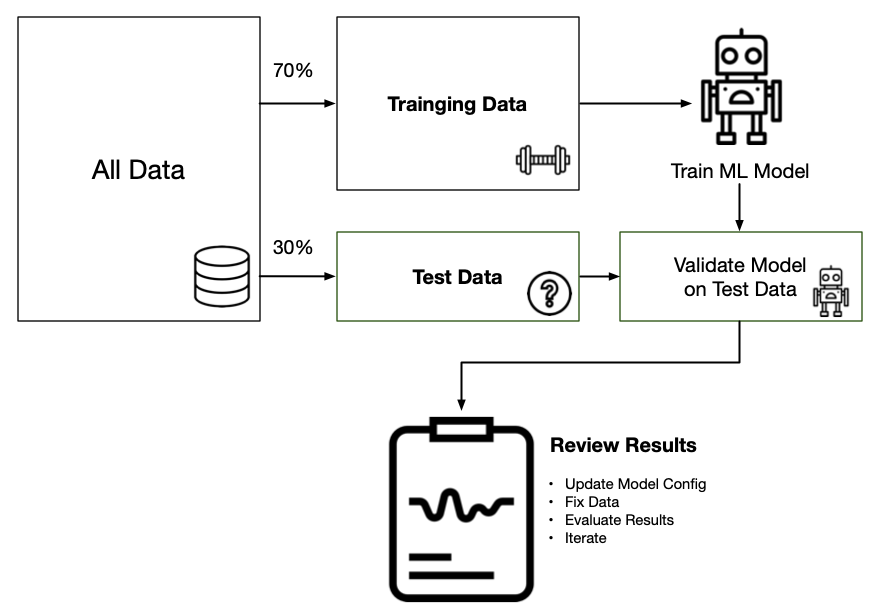

We split data into training and testing sets to evaluate the performance of a machine learning model. The training set is used to train or fit the model to the data, while the testing set is used to evaluate the model's performance on new, unseen data.

By splitting the data into separate training and testing sets, we can check whether the model has learned to generalize to new data or if it has simply memorized the training set. Evaluating the model on the testing set provides an estimate of the model's performance on new, unseen data, which is important for assessing the model's accuracy and reliability.

If we do not split the data and instead use the entire dataset for training the model, the model may become overfitted, which means that it learns to fit the training data perfectly but fails to generalize to new data. Overfitting can lead to poor performance on new data and is a common problem in machine learning. By splitting the data into training and testing sets, we can check for overfitting and adjust the model if necessary.

##### `train_test_split`
This is a critical step in building and evaluating a machine learning model.  We can control how big the training set is by changing either `training_size` or `test_size`.

> There is more than one way to prepare your data for validation and testing!  `train_test_split` is the simlest method to use but there are many others that are available once you learn the various tradeoffs.  Another notable method is called k-folds which splits the data into N groups and then tests your model across each set of groups using a different group to test on automatically.  

In [121]:
X = df_clean[predictor_columns]
y = df_clean[target_column]

## Setup train test split


#### Every scikit-learn model has a `.fit` method

The idea of "fit" is consistent throughout sklearn.  

1. It makes it easy to create and automate the creation of machine learning models.
2. It's a standard convention that once you've learned one model, there are many that work the same way.

However, this level of abstaction can give a false sense of understanding since each machine learning method will have different configurationn parameters and arrive at conclusions the same.

 - You still need to study math and statistics to get the most out of sklearn
 - Understanding fundamental concepts in machine learning theory makes you effective at using this tool
 - Learning to code Python and work with data to a deeper level is required
 

In [110]:
## init linear regression class

## fit linear regression instance on training data


 ##### In the case of `LinearRegression`, `.fit` calculates our coefficient paramters that are used for prediction.
 
 Linear regression is what's known as a "parametric method" because it provides parameters, calculated "weights" that can be used to calculate predictions.

In [116]:
## check the model coefficients (rounded if needed)


#### Most supervised machine learning models have a `.score` function

Recall these important terms:

- **True value** ($y$) = "Home Price"
- **Predicted value** ($\hat{y}$) = "Predicted Home Price"

The `.score` function, for linear regression is $r^2$ which is:

**Remember Residual Errors**

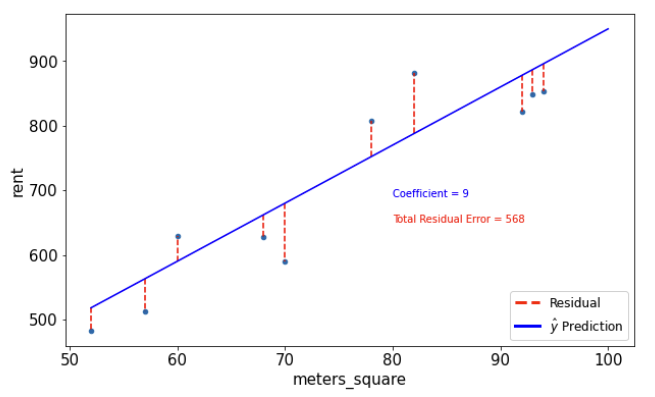

**RSS: "Squared" residuals**
We get the "Residual Sum of Square Errors" by "squaring" each of the residuals.  Remember a residual is the difference between the true value and the predicted value.  In math, when we "sqaure" a number, even a negative number, it makes it positive.

**TSS: Sum of squares**
Sum of squares is pretty much the same thing as **RSS** but instead of measuring the difference between the predicted value vs the average of true values, squared.


# $r^2 = 1 - \frac{\text{Residual Sum of Squared Errors}^2}{\text{total sum of squares}^2}$


In [117]:
## Score train set


In [118]:
## Score test set


#### Making Predictions
Now they we have our model ready to go, we can start using it on our DataFrame or on any other data source that has the same number of column features and data types.. Also assuming the data follows the same assumptions which is also important.

In [119]:
## Create predicts to new feature "predicted_price" using df_clean[predictor_columns]


In [120]:
## Review results


#### Time permitting: Other Metrics

We will import a few other metrics and see how they work, time permitting.